In [82]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [83]:
def synthetic_data(w,b,num_examples):
    """  y = Xw + b +噪声  """
    # 提供一个标量的均值（mean）和一个标量的标准差（std），以及你希望生成的张量的形状（size）
    x = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(x,w) + b
    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)
features, labels

(tensor([[ 1.2769, -0.1638],
         [-0.4213, -0.6198],
         [ 0.5735,  0.2251],
         ...,
         [ 0.6050, -1.2143],
         [-1.3636, -0.5486],
         [-0.9090,  1.1064]]),
 tensor([[ 7.3116],
         [ 5.4778],
         [ 4.5770],
         [ 1.3157],
         [ 1.8867],
         [13.1239],
         [ 7.2037],
         [ 2.2026],
         [ 4.2589],
         [ 9.6269],
         [ 2.9791],
         [ 9.2525],
         [-1.0014],
         [ 6.5203],
         [ 4.3304],
         [ 5.3405],
         [ 3.4476],
         [ 1.6115],
         [-2.0023],
         [ 5.8458],
         [ 6.4752],
         [ 0.7679],
         [ 2.0451],
         [ 0.5458],
         [ 6.8991],
         [ 1.6034],
         [ 2.3244],
         [ 0.9257],
         [ 3.1903],
         [ 4.6746],
         [12.5610],
         [-6.0096],
         [ 0.7846],
         [ 5.0020],
         [ 6.5731],
         [ 7.3739],
         [ 8.9855],
         [ 7.5561],
         [ 6.1581],
         [ 6.8382],
         [

In [84]:
features[:,1]

tensor([-1.6383e-01, -6.1982e-01,  2.2508e-01,  6.4159e-01,  9.0553e-01,
        -2.3612e+00, -3.3914e-01,  5.1108e-02, -1.2508e+00, -6.7558e-01,
         7.6477e-02,  1.0934e-01,  2.3611e-01, -6.1400e-02,  3.9906e-01,
        -1.5220e-02,  7.6419e-01,  3.4842e-01,  2.0938e+00, -1.4261e-01,
        -5.5560e-01,  1.1857e+00,  1.3360e-01,  8.8113e-01, -3.4578e-01,
         9.3242e-01,  1.2984e-01,  8.7792e-01,  5.9096e-01, -8.2853e-01,
        -2.0962e+00,  3.2098e+00, -5.6895e-01, -1.9139e-01, -3.9707e-01,
        -1.3026e+00, -2.1722e-01, -3.4759e-01,  2.0168e-01, -6.5204e-01,
        -2.2765e+00,  6.9070e-01,  1.5054e+00, -4.7543e-01, -7.3872e-01,
        -2.7085e-01,  1.0979e+00, -5.3738e-01, -1.2324e+00, -2.3473e-01,
         4.3983e-01,  1.1809e+00, -2.7831e-01, -8.7956e-01,  4.5503e-01,
        -1.7399e+00,  2.8228e-04,  1.6586e+00, -4.3950e-01,  6.8953e-01,
         1.2564e+00, -1.8806e+00,  1.1193e-01, -3.2586e-01, -1.0038e+00,
        -1.1730e+00,  1.1913e+00,  3.5076e-01,  2.2

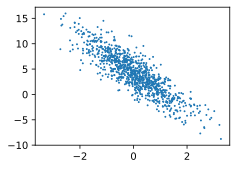

In [85]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)

In [86]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取，没有特点顺序
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[ 0.1371,  1.0839],
        [-0.7942, -1.1589],
        [ 0.3008,  2.8552],
        [ 0.1710,  1.8014],
        [ 0.1446,  0.8479],
        [-0.3633, -0.0500],
        [-0.6672, -1.6703],
        [-0.5831,  0.8584],
        [-0.4835,  0.0765],
        [-0.5886,  0.0043]]) 
 tensor([[ 0.7696],
        [ 6.5374],
        [-4.9181],
        [-1.5895],
        [ 1.6110],
        [ 3.6617],
        [ 8.5324],
        [ 0.1084],
        [ 2.9791],
        [ 3.0194]])


In [87]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
w,b

(tensor([[ 0.0044],
         [-0.0103]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [88]:
def linreg(x,w,b):
    return torch.matmul(x,w) + b

In [89]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [90]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [93]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean())}')
        

epoch1,loss5.366794721339829e-05
epoch2,loss5.363941454561427e-05
epoch3,loss5.402353417593986e-05
epoch4,loss5.3736417612526566e-05
epoch5,loss5.385911208577454e-05


In [92]:
print(f'w的估计误差:{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b-b}')

w的估计误差:tensor([-0.0002, -0.0001], grad_fn=<SubBackward0>)
b的估计误差:tensor([2.7180e-05], grad_fn=<RsubBackward1>)
